In [ ]:
# !pip install datasets
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

train_data, test_data = load_dataset('emotion',split=['train','test']) # load dataset from huggingface hub
train_data_pd = pd.DataFrame(train_data) # convert to pandas data frame
test_data_pd = pd.DataFrame(test_data)

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 7.5 MB/s 
     |████████████████████████████████| 1.1 MB 59.7 MB/s 
     |████████████████████████████████| 212 kB 76.9 MB/s 
     |████████████████████████████████| 140 kB 68.8 MB/s 
     |████████████████████████████████| 101 kB 13.9 MB/s 
     |████████████████████████████████| 596 kB 62.6 MB/s 
     |████████████████████████████████| 127 kB 75.8 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 271 kB 73.2 MB/s 
     |████████████████████████████████| 144 kB 52.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dep

In [ ]:
texts=train_data_pd["text"]

In [ ]:
train_labels=train_data_pd["label"]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer();
tokenizer.fit_on_texts(texts)

In [ ]:
total_words = len(tokenizer.word_index) + 1
input=[]
train_sequences=[]
for text in texts:
  input.append(text)
for text in input:
  train_sequences.append(tokenizer.texts_to_sequences([text])[0])
  	

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
mx=0
for sentence in train_sequences:
    if len(sentence)>mx:
        mx=len(sentence)
train_sequences = pad_sequences(train_sequences, maxlen=mx, padding='pre')

In [ ]:
import tensorflow.keras.utils as ku 

In [ ]:
train_labels=ku.to_categorical(train_labels, num_classes=6)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 50, input_length=mx))  #(# Your Embedding Layer)
model.add(LSTM(50))  #(# A Bidirectional LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(Dense(6, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  #(# Pick a loss function and an optimizer)
print(model.summary()) #print model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 66, 50)            760650    
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 306       
                                                                 
Total params: 781,156
Trainable params: 781,156
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(train_sequences, train_labels, epochs=50, verbose=1) #change the number of epochs after observing the plots later on at the point where the accuracy saturates

Epoch 1/50
500/500 [==============================] - 4s 6ms/step - loss: 1.2239 - accuracy: 0.5354
Epoch 2/50
500/500 [==============================] - 3s 6ms/step - loss: 0.3717 - accuracy: 0.8822
Epoch 3/50
500/500 [==============================] - 3s 6ms/step - loss: 0.1728 - accuracy: 0.9455
Epoch 4/50
500/500 [==============================] - 3s 6ms/step - loss: 0.1151 - accuracy: 0.9647
Epoch 5/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0837 - accuracy: 0.9742
Epoch 6/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0724 - accuracy: 0.9778
Epoch 7/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0507 - accuracy: 0.9845
Epoch 8/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0394 - accuracy: 0.9881
Epoch 9/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0385 - accuracy: 0.9881
Epoch 10/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0337 - accuracy: 0.9895

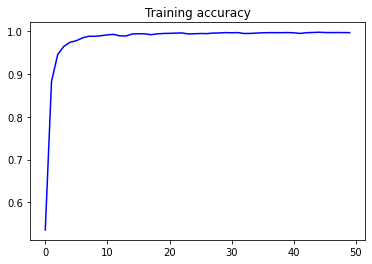

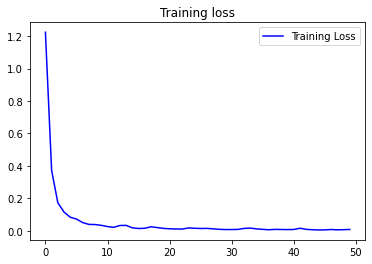

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
texts_test=test_data_pd["text"]
input=[]
test_sequences=[]
for text in texts_test:
  input.append(text)
for text in input:
  test_sequences.append(tokenizer.texts_to_sequences([text])[0])

In [ ]:
test_sequences = pad_sequences(test_sequences, maxlen=mx, padding='pre')

In [ ]:
 test_labels=test_data_pd["label"]
 test_labels=ku.to_categorical(test_labels, num_classes=6)

In [ ]:
preds=model.predict(test_sequences)

In [ ]:
import numpy as np
preds=np.argmax(preds, axis=1)

In [ ]:
model.evaluate(test_sequences, test_labels)

63/63 [==============================] - 1s 4ms/step - loss: 0.5386 - accuracy: 0.9025


[0.5385578870773315, 0.9024999737739563]